In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/bigcontest/data/'

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_korean = pd.read_csv(path+'KOREAN.csv',encoding = 'euc-kr')

In [4]:
df_korean['base_date'] = pd.to_datetime(df_korean['base_date'])
map_sex = {'남성':0,'여성':1}
df_korean[['sex']] = df_korean[['sex']].applymap(map_sex.get)

In [5]:
df_korean[:20]

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,1,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,1,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,1,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,1,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,1,20,609.7710,5.9490,148.7246,제주
5,2018-01-01,1,제주시,50110250,한림읍,1,20,0.0000,8.9235,359.9136,그외
6,2018-01-01,1,제주시,50110250,한림읍,1,30,1002.1208,10.1911,217.4093,제주
7,2018-01-01,1,제주시,50110250,한림읍,1,30,0.0000,0.0000,478.9798,그외
8,2018-01-01,1,제주시,50110250,한림읍,1,40,1530.5014,38.2625,292.1866,제주
9,2018-01-01,1,제주시,50110250,한림읍,1,40,0.0000,13.9136,340.8844,그외


In [6]:
df_group_kor = df_korean.groupby(['emd_nm','base_date','time']).sum()
df_group_kor

emd_cd  sex  ...  work_pop_cnt  visit_pop_cnt
emd_nm base_date  time                   ...                             
건입동    2018-01-01 1     1803981240   18  ...      506.5472      5123.2413
                  2     1803981240   18  ...      501.6065      5236.8215
                  3     1803981240   18  ...      477.0906      5190.2790
                  4     1803981240   18  ...      451.9721      5257.0690
                  5     1703760060   18  ...      460.2766      5436.7787
...                            ...  ...  ...           ...            ...
효돈동    2021-06-30 20    1804699800   18  ...      176.5715      1857.2576
                  21    1804699800   18  ...      155.6464      1776.4128
                  22    1804699800   18  ...      136.4883      1802.0158
                  23    1804699800   18  ...      121.6452      1692.6367
                  24    1804699800   18  ...       75.4621       926.5442

[1317864 rows x 6 columns]

In [7]:
def using_Grouper(df):
    level_values = df.index.get_level_values
    return (df.groupby([level_values(0)]
                       +[pd.Grouper(freq='M', level=-2)]).sum()/24)
df_mg_kor = using_Grouper(df_group_kor)
df_mg_kor.drop(['emd_cd','sex','age'],axis=1,inplace=True)
df_mg_kor.rename(columns={'resd_pop_cnt':'resd_pop_cnt_kr','work_pop_cnt':'work_pop_cnt_kr','visit_pop_cnt':'visit_pop_cnt_kr'},inplace = True)
df_mg_kor

resd_pop_cnt_kr  work_pop_cnt_kr  visit_pop_cnt_kr
emd_nm base_date                                                     
건입동    2018-01-31    205665.958042     29330.638250     205787.375954
       2018-02-28    190188.039883     24234.368196     185169.368388
       2018-03-31    193921.848613     29466.968017     199870.948733
       2018-04-30    184433.299471     30916.976521     201766.706108
       2018-05-31    189438.533950     31618.150308     209823.822783
...                            ...              ...               ...
효돈동    2021-02-28    113900.446367      7222.846379      50609.464458
       2021-03-31    118429.240500      6299.777775      48450.743083
       2021-04-30    113946.496708      7149.632704      49491.105446
       2021-05-31    121303.192921      6388.537571      52363.393421
       2021-06-30    116404.245421      6082.447217      50252.903392

[1806 rows x 3 columns]

In [8]:
df_mg = pd.read_csv(path+'monthly_group.csv')


In [9]:
df_mg['base_date'] = pd.to_datetime(df_mg['base_date'])
df_mg = df_mg.groupby(['emd_nm','base_date']).sum()

In [11]:
df_mg

em_cnt        em_g  ...  visit_pop_cnt  visit_pop_cnt_s
emd_nm base_date                        ...                                
건입동    2018-01-31  18416.0  45646550.0  ...    4802.786437      3259.294983
       2018-02-28  17491.0  42953550.0  ...    4042.264892      3489.270396
       2018-03-31  19396.0  46422450.0  ...    4513.547042      4677.452267
       2018-04-30  19179.0  42438700.0  ...    6095.972187      6332.157233
       2018-05-31  21277.0  44893300.0  ...    4966.860958      6201.046733
...                    ...         ...  ...            ...              ...
효돈동    2021-02-28   6795.0  26128400.0  ...     867.948538         3.389325
       2021-03-31   7492.0  26845400.0  ...     887.284692         8.879287
       2021-04-30   7399.0  25200200.0  ...     883.402142         8.076117
       2021-05-31   6682.0  21724850.0  ...    1254.002258        15.498625
       2021-06-30   8720.0  27554100.0  ...     890.858300         8.531258

[1806 rows x 12 columns]

In [12]:
df_mg = pd.concat([df_mg,df_mg_kor],axis=1)

In [13]:
df_mg.to_csv(path+'monthly_group.csv')

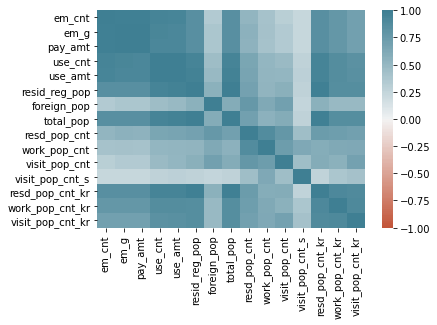

In [14]:
corr_mg = df_mg.corr().apply(lambda x: round(x,3))
ax = sns.heatmap(
    corr_mg, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)

In [15]:
considered = ['em_cnt','em_g','pay_amt','use_cnt','use_amt',
              'resid_reg_pop','total_pop','resd_pop_cnt_kr','work_pop_cnt_kr','visit_pop_cnt_kr']

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [17]:
dataset = df_mg[considered]

In [18]:
dataset.head()

em_cnt        em_g  ...  work_pop_cnt_kr  visit_pop_cnt_kr
emd_nm base_date                        ...                                   
건입동    2018-01-31  18416.0  45646550.0  ...     29330.638250     205787.375954
       2018-02-28  17491.0  42953550.0  ...     24234.368196     185169.368388
       2018-03-31  19396.0  46422450.0  ...     29466.968017     199870.948733
       2018-04-30  19179.0  42438700.0  ...     30916.976521     201766.706108
       2018-05-31  21277.0  44893300.0  ...     31618.150308     209823.822783

[5 rows x 10 columns]

In [19]:
adfuller_test = adfuller(dataset['em_g'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -6.341355016238231
p-value: 2.74970602167547e-08


In [20]:
data = {}
emd_nm = []
for nm, month in dataset.groupby(level=0):
  emd_nm.append(nm)
  data[nm] = month.reset_index(drop=True)

len(data), emd_nm

(43,
 ['건입동',
  '구좌읍',
  '남원읍',
  '노형동',
  '대륜동',
  '대정읍',
  '대천동',
  '도두동',
  '동홍동',
  '봉개동',
  '삼도1동',
  '삼도2동',
  '삼양동',
  '서홍동',
  '성산읍',
  '송산동',
  '아라동',
  '안덕면',
  '애월읍',
  '연동',
  '영천동',
  '예래동',
  '오라동',
  '외도동',
  '용담1동',
  '용담2동',
  '우도면',
  '이도1동',
  '이도2동',
  '이호동',
  '일도1동',
  '일도2동',
  '정방동',
  '조천읍',
  '중문동',
  '중앙동',
  '천지동',
  '추자면',
  '표선면',
  '한경면',
  '한림읍',
  '화북동',
  '효돈동'])

In [21]:
adfuller_test = adfuller(data['건입동']['em_g'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: 1.4608176654359992
p-value: 0.9973736484194473


In [22]:
data_diff = data['건입동'].diff().dropna()

In [23]:
adfuller_test = adfuller(data_diff['em_g'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -3.685817078740696
p-value: 0.004317130618342678


In [24]:
data_diff = {}
data_log = {}
for nm in emd_nm:
  data_log[nm] = pd.DataFrame(np.nan_to_num(np.log(data[nm])))
  data_diff[nm] = data_log[nm].diff().dropna()

In [29]:
data_diff['구좌읍']

,0,1,2,3,4,5,6,7,8,9
1,0.000000e+00,0.000000e+00,0.000000e+00,-0.080407,-0.044887,0.002309,0.002292,-0.103193,-0.271916,-0.131220
2,0.000000e+00,0.000000e+00,0.000000e+00,0.172229,0.057501,-0.000897,-0.000928,0.075311,0.212587,0.202867
3,0.000000e+00,0.000000e+00,0.000000e+00,0.047104,0.058901,0.000769,0.000619,-0.008357,0.440256,0.079894
4,0.000000e+00,0.000000e+00,0.000000e+00,0.023500,0.083852,0.002368,0.002843,0.054571,-0.039516,0.054245
5,0.000000e+00,0.000000e+00,0.000000e+00,0.005975,-0.023319,0.001724,0.003511,-0.031425,0.021140,-0.057254
6,0.000000e+00,0.000000e+00,0.000000e+00,0.042207,-0.007256,0.002740,0.003377,0.031737,-0.072169,0.138285
7,0.000000e+00,0.000000e+00,0.000000e+00,0.022137,0.080212,-0.002421,-0.001902,0.029078,-0.049970,0.077995
8,0.000000e+00,0.000000e+00,0.000000e+00,-0.059183,0.014316,0.000510,0.000675,-0.057937,-0.061201,-0.228022
9,0.000000e+00,0.000000e+00,0.000000e+00,0.009064,-0.094330,-0.001021,-0.000614,0.024753,0.162198,-0.050016
10,0.000000e+00,0.000000e+00,0.000000e+00,-0.094072,-0.060691,-0.000958,-0.000737,-0.034770,-0.025247,-0.211695


In [26]:
for nm in emd_nm:
  print(nm)
  for c in data_diff[nm].columns:
    adfuller_test = adfuller(data_diff[nm][c], autolag= "AIC")
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))

건입동
ADF test statistic: -3.785260413422304
p-value: 0.0030617720469825298
ADF test statistic: -3.4662204522011635
p-value: 0.00889820593606335
ADF test statistic: -4.183822061780601
p-value: 0.0007017027583689549
ADF test statistic: -5.989494673940641
p-value: 1.7594597478962962e-07
ADF test statistic: -3.9795510779600547
p-value: 0.0015214553402562424
ADF test statistic: -4.896178972667438
p-value: 3.547655368367506e-05
ADF test statistic: -4.766008947651476
p-value: 6.314127103194249e-05
ADF test statistic: -1.164822240611665
p-value: 0.6885423657525418
ADF test statistic: -5.428482426743246
p-value: 2.9505546627837852e-06
ADF test statistic: -2.2322681960659416
p-value: 0.19474305465411618
구좌읍


MissingDataError: ignored

In [105]:
train = {}
test = {}
for nm in emd_nm:
  train[nm] = data_diff[nm].iloc[:-6,:]
  test[nm] = data_diff[nm].iloc[-6:,:]

In [119]:
for nm in emd_nm:
  forecasting_model = VAR(train[nm])
  results = forecasting_model.fit(1)
  results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was pro

LinAlgError: ignored

In [113]:
forecasting_model = VAR(train['건입동'])
results_aic = []
for p in range(1,10):
  print(p)
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

1
2
3


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


LinAlgError: ignored